In [2]:

"""
The Automation Files: Who’s Safe, Who’s Next?
A data detective story uncovering which jobs will survive the AI revolution.
"""

'\nThe Automation Files: Who’s Safe, Who’s Next?\nA data detective story uncovering which jobs will survive the AI revolution.\n'

In [3]:
# Chapter 1: The Case of the Missing Pieces

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [5]:
# Load the dataset (upload required in Google Colab)
from google.colab import files
uploaded = files.upload()

# Read the CSV file
df = pd.read_csv('your_job_vs_ai_dataset_super_dirty_enhanced.csv')

Saving your_job_vs_ai_dataset_super_dirty_enhanced.csv to your_job_vs_ai_dataset_super_dirty_enhanced.csv


In [6]:
# Show raw data preview
df.head()

,Job_ID,Job_Title,Industry,Required_Skills,Routine_Tasks_Percentage,Creativity_Required,Human_Interaction_Required,Problem_Solving_Complexity,Data_Analysis_Involved,Physical_Labor_Involved,Emotional_Intelligence_Required,Adaptability_to_New_Tech,Org_AI_Adoption_Outlook,Work_Automated_Forecast_5Y_Percentage,Strategic_Impact_Level,Primary_AI_Impact_Area_Org,AI_Integration_Level_5Y_Forecast,Org_Investment_Change_AI_Related_Tech,AI_Automation_Potential_Score,AI_Proof_Category
0,JOB_066,Pharmacist,Entertainment,"Coding, Statistical Analysis, Robotics",68.0,6.0,2,7,Yes,Yes,10,2,Average,37,Low,Supply_Chain_Strategy,Assist,Increase 1-10%,5.49,Low Vulnerability
1,JOB_002,Construction Worker,Science,"Public Speaking, Supply Chain Optimization, Cu...",61.0%,5.0,7,6,Yes,No,2,1,Average,42,High,Overall Organizational Purpose,Draft,Increase >10%,6.11,Low Vulnerability
2,JOB_033,Geologist,Entertainment,"Medical Knowledge, Legal Research",34.0,10.0,9,2,Yes,Yes,1,4,Average,35,Medium,Product/Service Strategy,Assist,Remain Same,5.13,Low Vulnerability
3,JOB_081,Surgeon,Healthcare,"Statistical Analysis, Cloud Computing",12.0,4.0,4,1,Yes,No,9,1,Average,50,Medium,Talent Strategy,Draft,Remain Same,5.36,Low Vulnerability
4,JOB_047,Operations Manager,Entertainment,"Strategic Planning, Data Analysis",38.0,2.0,4,4,Yes,Yes,10,10,Cautious,43,Medium,NaN,Draft,Increase 1-10%,5.02,Low Vulnerability


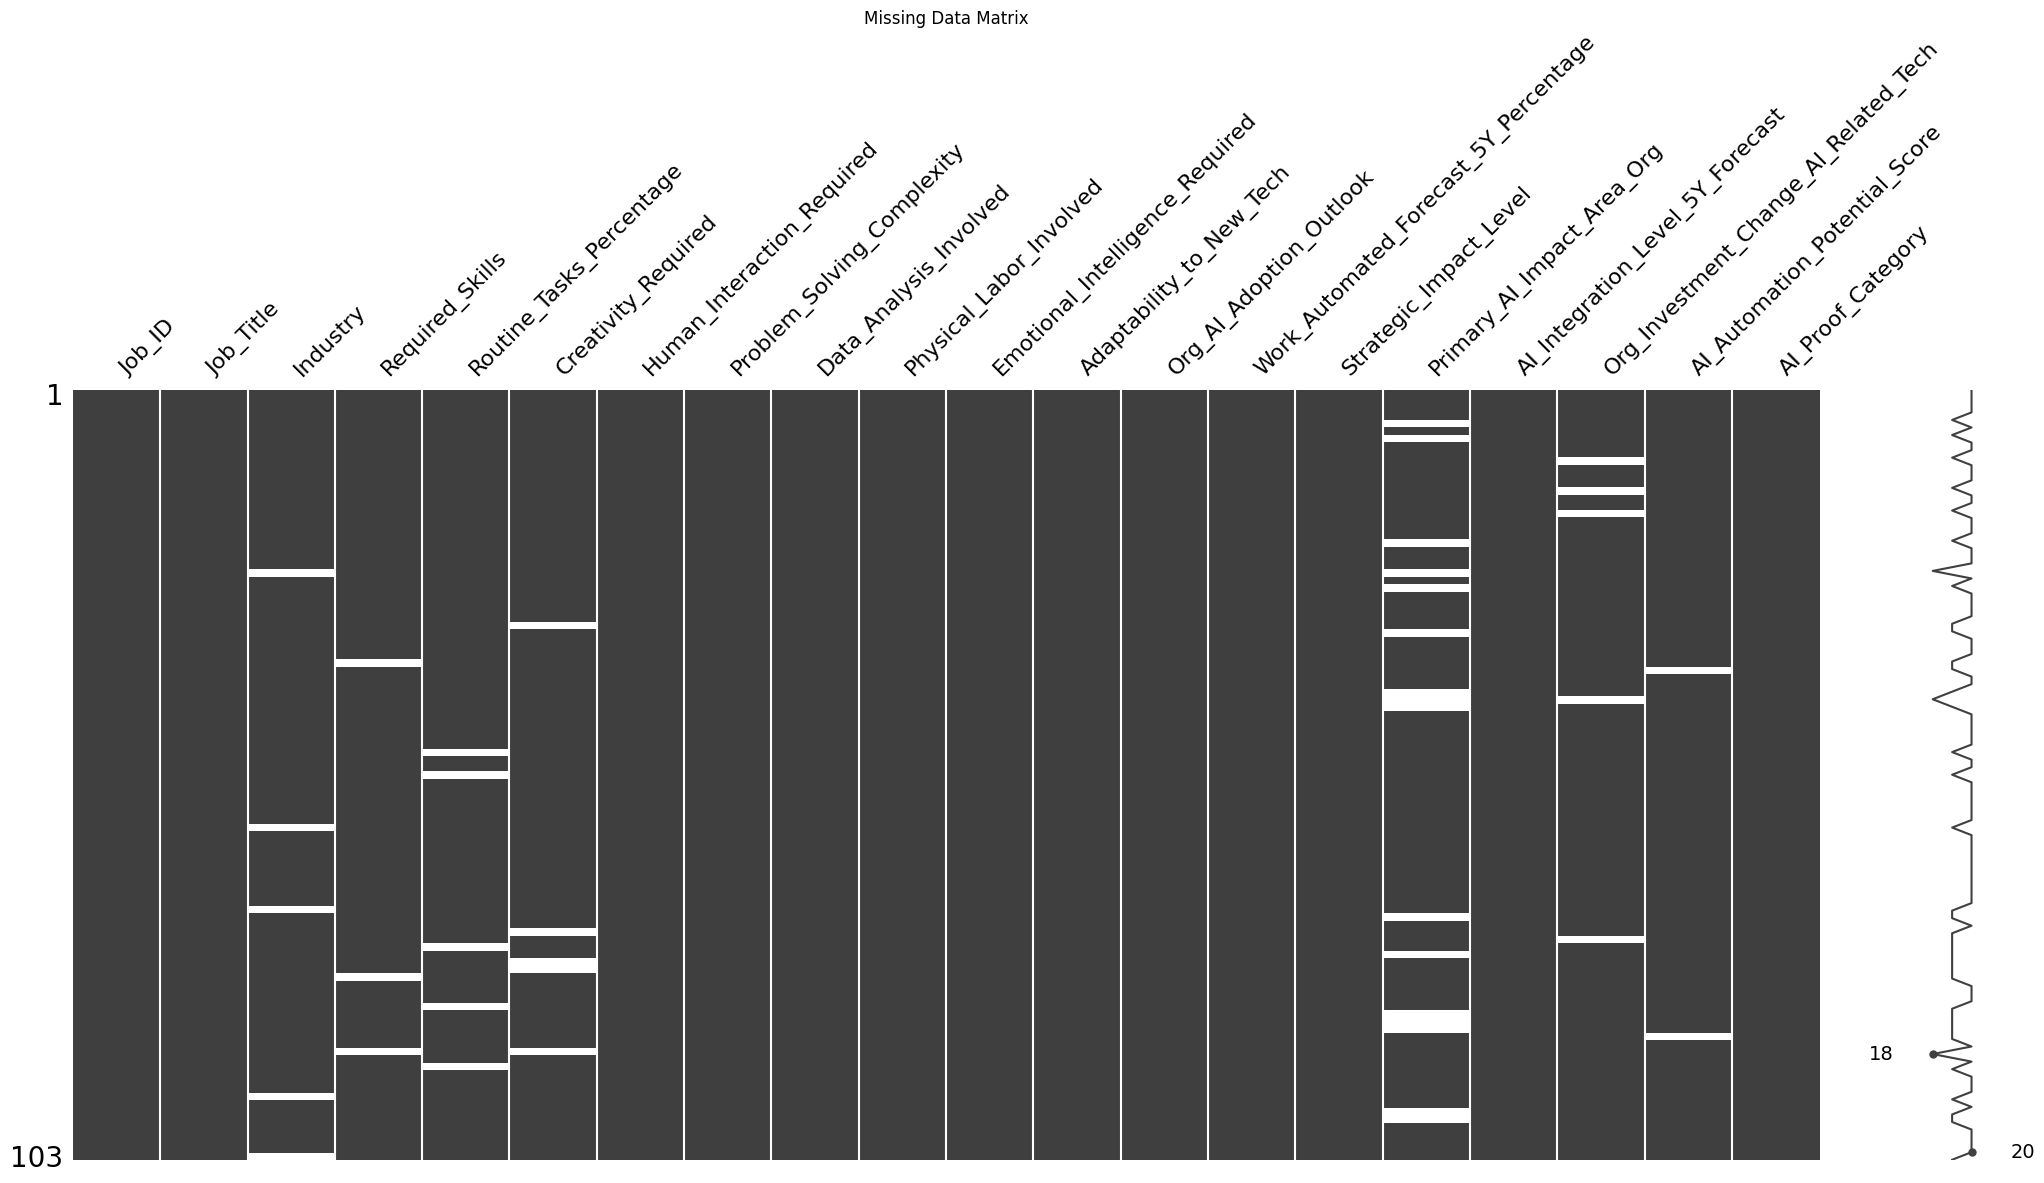

In [7]:
# Visualize missing data
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

In [8]:
# Cleaning: Convert columns to numeric where needed
df['Routine_Tasks_Percentage'] = pd.to_numeric(df['Routine_Tasks_Percentage'], errors='coerce')
df['Routine_Tasks_Percentage'].fillna(df['Routine_Tasks_Percentage'].mean(), inplace=True)

/tmp/ipython-input-8-1069766322.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Routine_Tasks_Percentage'].fillna(df['Routine_Tasks_Percentage'].mean(), inplace=True)


/tmp/ipython-input-25-998215369.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')


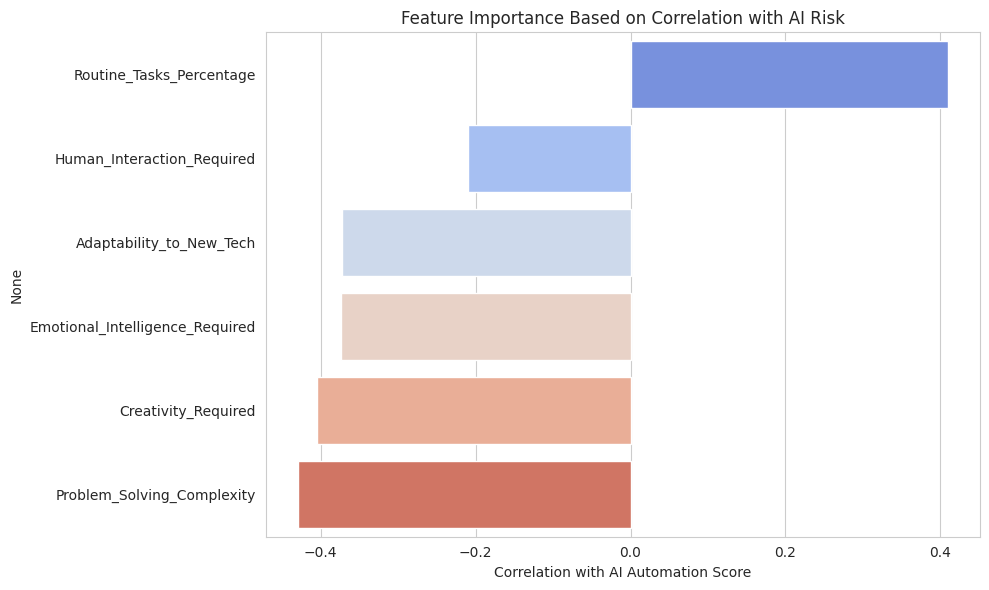

In [25]:
#feature importance chart

target = 'AI_Automation_Potential_Score'

corr = df.corr(numeric_only=True)[target].drop(target).sort_values(ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
plt.title("Feature Importance Based on Correlation with AI Risk")
plt.xlabel("Correlation with AI Automation Score")
plt.tight_layout()
plt.savefig("feature_importance_correlation.png")
plt.show()

In [10]:
# Drop rows with other missing values
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [11]:
# Chapter 2: Sketching the Suspects

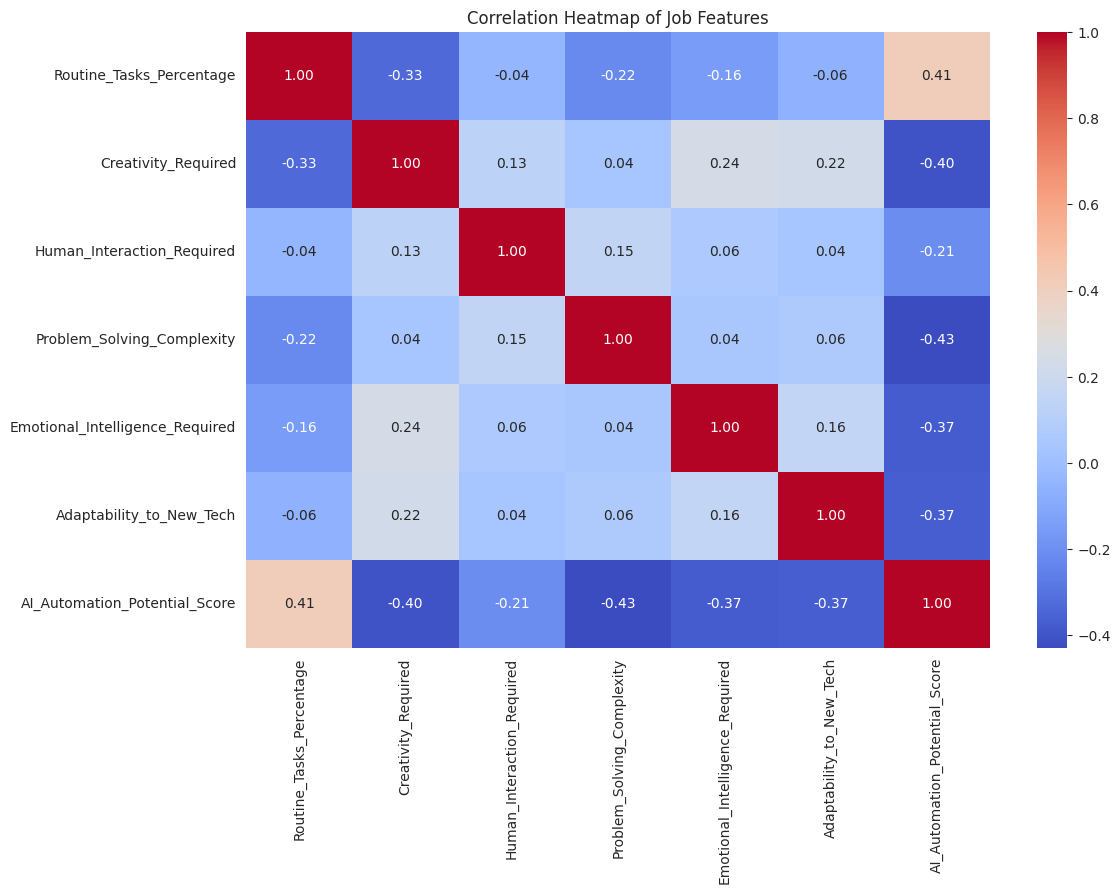

In [12]:
# Correlation heatmap
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Job Features")
plt.show()

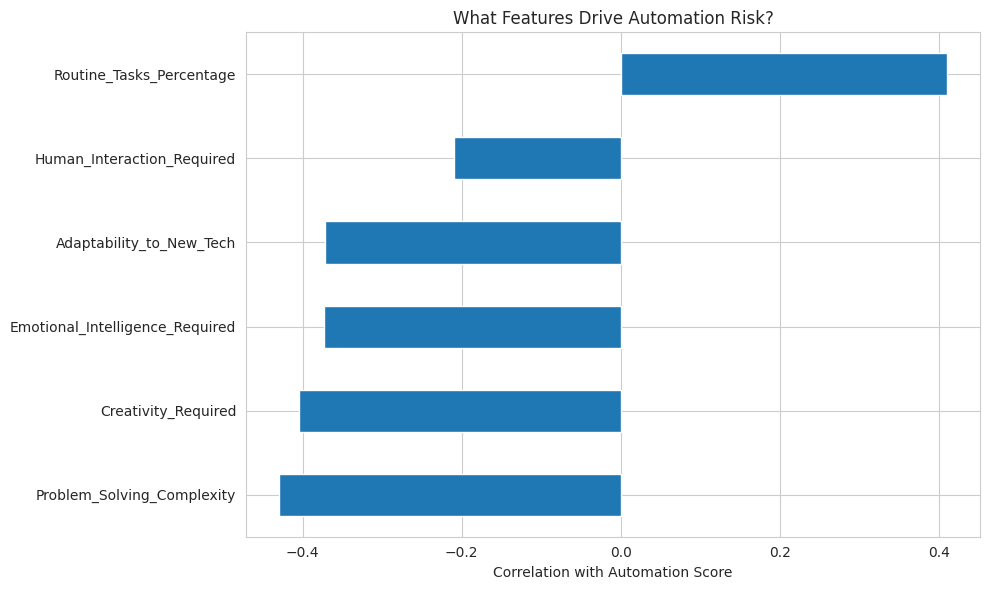

In [13]:
# Bar chart of features most correlated with automation
correlation_with_risk = df.corr(numeric_only=True)['AI_Automation_Potential_Score'].drop('AI_Automation_Potential_Score')
correlation_with_risk.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("What Features Drive Automation Risk?")
plt.xlabel("Correlation with Automation Score")
plt.tight_layout()
plt.show()

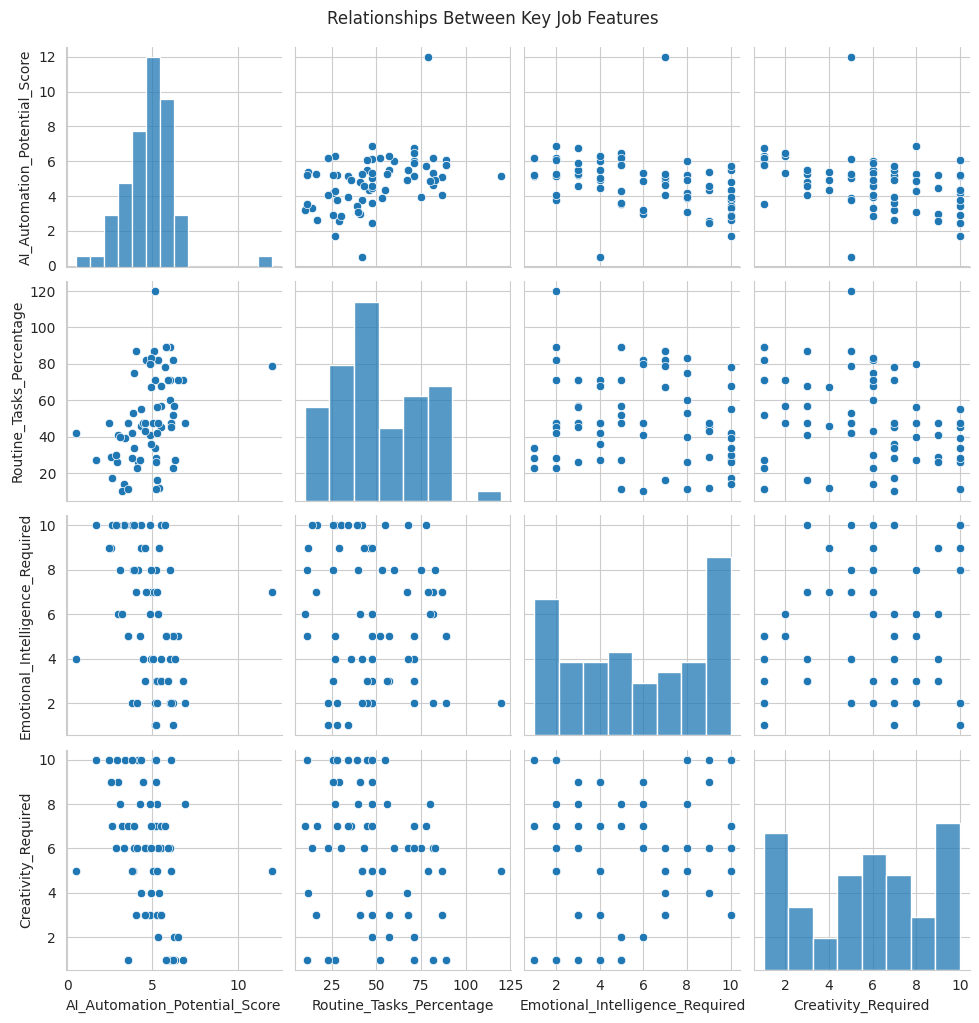

In [14]:
# Pairplot of selected features
selected_features = ['AI_Automation_Potential_Score', 'Routine_Tasks_Percentage', 'Emotional_Intelligence_Required', 'Creativity_Required']
sns.pairplot(df[selected_features])
plt.suptitle("Relationships Between Key Job Features", y=1.02)
plt.show()

In [15]:
# Chapter 3: The Prime Suspects

/tmp/ipython-input-16-2610557904.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AI_Automation_Potential_Score', y='Job_Title', data=top_10_jobs, palette="Reds")
/tmp/ipython-input-16-2610557904.py:8: UserWarning: Glyph 128287 (\N{KEYCAP TEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128287 (\N{KEYCAP TEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


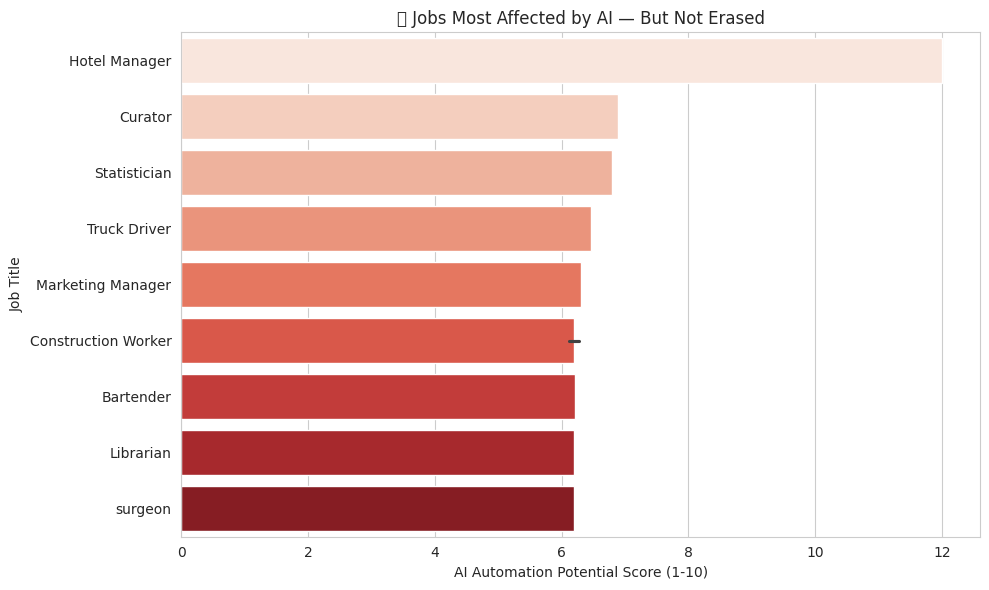

In [16]:
# Countdown style: Top 10 risky jobs
top_10_jobs = df[['Job_Title', 'AI_Automation_Potential_Score']].sort_values(by='AI_Automation_Potential_Score', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='AI_Automation_Potential_Score', y='Job_Title', data=top_10_jobs, palette="Reds")
plt.title("🔟 Jobs Most Affected by AI — But Not Erased")
plt.xlabel("AI Automation Potential Score (1-10)")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()


/tmp/ipython-input-17-153040884.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AI_Automation_Potential_Score', y='Job_Title', data=safe_jobs, palette="Blues")
/tmp/ipython-input-17-153040884.py:8: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


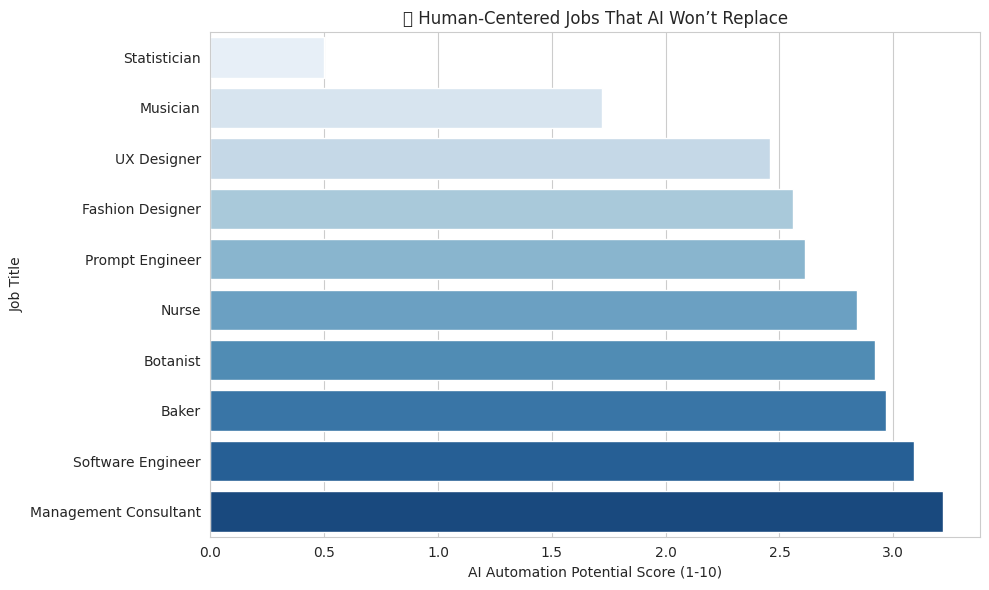

In [17]:
# Hopeful note: Show 10 least risky jobs
safe_jobs = df[['Job_Title', 'AI_Automation_Potential_Score']].sort_values(by='AI_Automation_Potential_Score').head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='AI_Automation_Potential_Score', y='Job_Title', data=safe_jobs, palette="Blues")
plt.title("🔹 Human-Centered Jobs That AI Won’t Replace")
plt.xlabel("AI Automation Potential Score (1-10)")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()

In [18]:
# Chapter 4: The Big Reveal

/tmp/ipython-input-19-3831720406.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_risk.values, y=industry_risk.index, palette=colors)


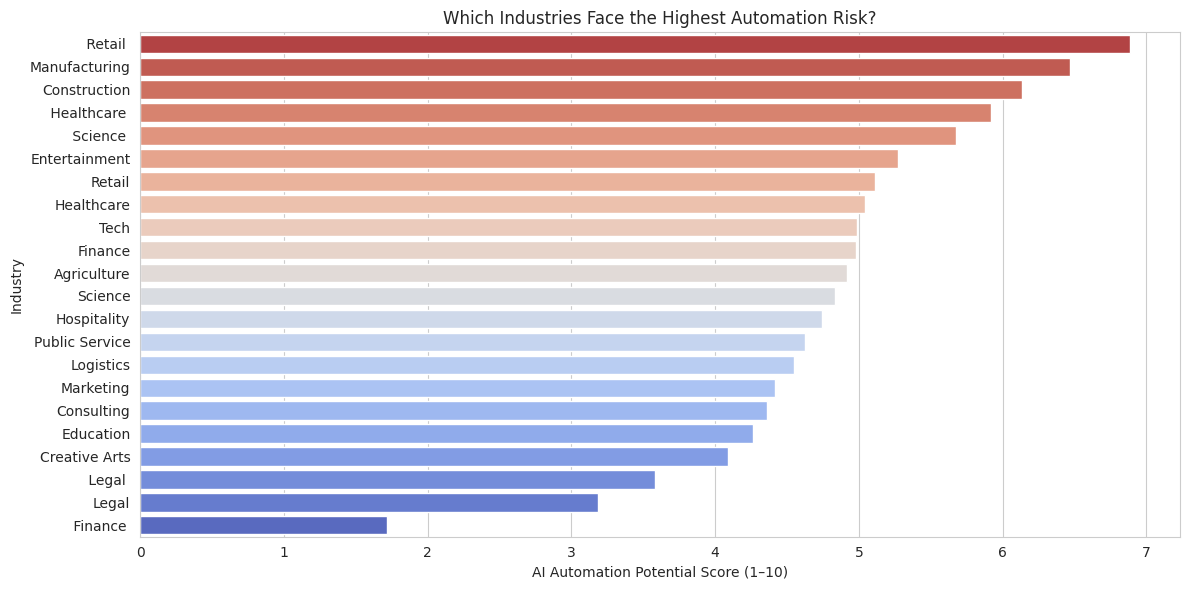

In [19]:
# Group by industry
industry_risk = df.groupby("Industry")["AI_Automation_Potential_Score"].mean().sort_values(ascending=False)

# Color-coded industry chart
colors = sns.color_palette("coolwarm", n_colors=len(industry_risk))[::-1]
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_risk.values, y=industry_risk.index, palette=colors)
plt.title("Which Industries Face the Highest Automation Risk?")
plt.xlabel("AI Automation Potential Score (1–10)")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

In [24]:
#Industry-Wise Average AI Risk Chart

industry_risk = df.groupby('Industry')['AI_Risk_Score'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=industry_risk.values, y=industry_risk.index, palette='viridis')
plt.title("Average AI Risk Score by Industry")
plt.xlabel("Average AI Risk Score")
plt.tight_layout()
plt.savefig("industry_risk_barplot.png")
plt.show()

KeyError: 'Column not found: AI_Risk_Score'

In [20]:
# Chapter 5: What AI Can’t Replace

In [21]:
# Text-only insights
print("WHAT AI CAN’T REPLACE:")
print("- Emotional intelligence")
print("- Empathy and listening")
print("- Strategic decision-making")
print("- Creativity and cultural intuition")
print("- Human connection and care")

WHAT AI CAN’T REPLACE:
- Emotional intelligence
- Empathy and listening
- Strategic decision-making
- Creativity and cultural intuition
- Human connection and care


In [22]:
# Chapter 6: Reflection & Vision

In [23]:
# Personal reflection section for slides
print("REFLECTION:")
print("This project helped me explore how data can be used to address future-of-work questions.")
print("Inspired by real-world reports, I created a plausible dataset and learned how to clean, analyze, and visualize job-related risks.")
print("Jobs are not disappearing — they are evolving. Like how TV didn’t kill radio, AI may transform roles rather than erase them.")

REFLECTION:
This project helped me explore how data can be used to address future-of-work questions.
Inspired by real-world reports, I created a plausible dataset and learned how to clean, analyze, and visualize job-related risks.
Jobs are not disappearing — they are evolving. Like how TV didn’t kill radio, AI may transform roles rather than erase them.
